In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [51]:
####Q1. For accounts discharged during 2019, which were the most common primary diagnoses? Secondary diagnoses?#####

# Importing libraries
import pandas as pd
from tabulate import tabulate

# Read the CSV files into pandas DataFrames
diagnosis_df = pd.read_csv('./Transactional Data/diagnosis.csv')
accounts_df = pd.read_csv('./Transactional Data/accounts.csv')
lookup_table_diagnosis_df = pd.read_csv('./Reference Data/lookup_table_diagnosis.csv')

##Primary diagnosis start##
# Filter accounts discharged during 2019
accounts_2019 = accounts_df[accounts_df['Discharge Year'] == 2019]

# Join diagnosis and accounts DataFrames
merged_df = pd.merge(diagnosis_df, accounts_2019, on='Account ID', how='inner')

# Filter primary diagnoses and group by diagnosis code to get frequency
primary_diagnoses = merged_df[merged_df['Diagnosis Sequence'] == 1]
diagnosis_frequency = primary_diagnoses['Diagnosis Code'].value_counts().reset_index()

# Rename columns
diagnosis_frequency.columns = ['Diagnosis Code', 'Frequency']

# Merge with lookup table to get diagnosis descriptions
result_df = pd.merge(diagnosis_frequency.head(10), lookup_table_diagnosis_df, on='Diagnosis Code', how='left')

# Select relevant columns and format the diagnosis code and description
result_df['Diagnosis'] = result_df['Diagnosis Code'] + ' (' + result_df['Diagnosis Description'] + ')'
result = result_df[['Diagnosis Code', 'Diagnosis Description', 'Frequency']]
result.columns = ['Code', 'Description', 'Frequency']

# Print the top 10 most common primary diagnoses
print("\nTop 10 Most Common Primary Diagnoses")
print(tabulate(result, headers=['Code', 'Description', 'Frequency'], tablefmt='pretty', stralign='left', showindex=False))

##Secondary diagnosis start##
# Filter secondary diagnoses and group by diagnosis code to get frequency
secondary_diagnoses = merged_df[merged_df['Diagnosis Sequence'] > 1]
diagnosis_frequency_secondary = secondary_diagnoses['Diagnosis Code'].value_counts().reset_index()

# Rename columns
diagnosis_frequency_secondary.columns = ['Diagnosis Code', 'Frequency']

# Merge with lookup table to get diagnosis descriptions
result_df_secondary = pd.merge(diagnosis_frequency_secondary.head(10), lookup_table_diagnosis_df, on='Diagnosis Code', how='left')

# Select relevant columns and format the diagnosis code and description
result_df_secondary['Diagnosis'] = result_df_secondary['Diagnosis Code'] + ' (' + result_df_secondary['Diagnosis Description'] + ')'
result_secondary = result_df_secondary[['Diagnosis Code', 'Diagnosis Description', 'Frequency']]
result_secondary.columns = ['Code', 'Description', 'Frequency']

# Print the top 10 most common secondary diagnoses
print("\nTop 10 Most Common Secondary Diagnoses:")
print(tabulate(result_secondary, headers=['Code', 'Description', 'Frequency'], tablefmt='pretty', stralign='left', showindex=False))



Top 10 Most Common Primary Diagnoses
+--------+--------------------------------------------------------------+-----------+
| Code   | Description                                                  | Frequency |
+--------+--------------------------------------------------------------+-----------+
| Z38.00 | Single liveborn infant, delivered vaginally                  | 74        |
| A41.9  | Sepsis, unspecified organism                                 | 51        |
| Z38.01 | Single liveborn infant, delivered by cesarean                | 48        |
| J18.9  | Pneumonia, unspecified organism                              | 40        |
| J44.1  | Chronic obstructive pulmonary disease w (acute) exacerbation | 35        |
| N39.0  | Urinary tract infection, site not specified                  | 32        |
| M17.9  | Osteoarthritis of knee, unspecified                          | 30        |
| I48.91 | Unspecified atrial fibrillation                              | 29        |
| R07.82 | Inter

Top MS-DRG Groups by Average Total Charges
+-------------+-------------------------+--------------------+
| MS DRG Code | MS DRG Description      | Total Charges      |
+-------------+-------------------------+--------------------+
| 4           | TRACHEOSTOMY WITH MV... | 630043.3966666666  |
| 3           | ECMO OR TRACHEOSTOMY... | 448226.595         |
| 652         | KIDNEY TRANSPLANT       | 420861.48          |
| 915         | ALLERGIC REACTIONS W... | 321572.91000000003 |
| 266         | ENDOVASCULAR CARDIAC... | 291848.07          |
| 226         | CARDIAC DEFIBRILLATO... | 220603.875         |
| 957         | OTHER O.R. PROCEDURE... | 194860.9833333333  |
| 207         | RESPIRATORY SYSTEM D... | 194220.29          |
| 25          | CRANIOTOMY AND ENDOV... | 192954.16          |
| 224         | CARDIAC DEFIBRILLATO... | 190332.06          |
+-------------+-------------------------+--------------------+


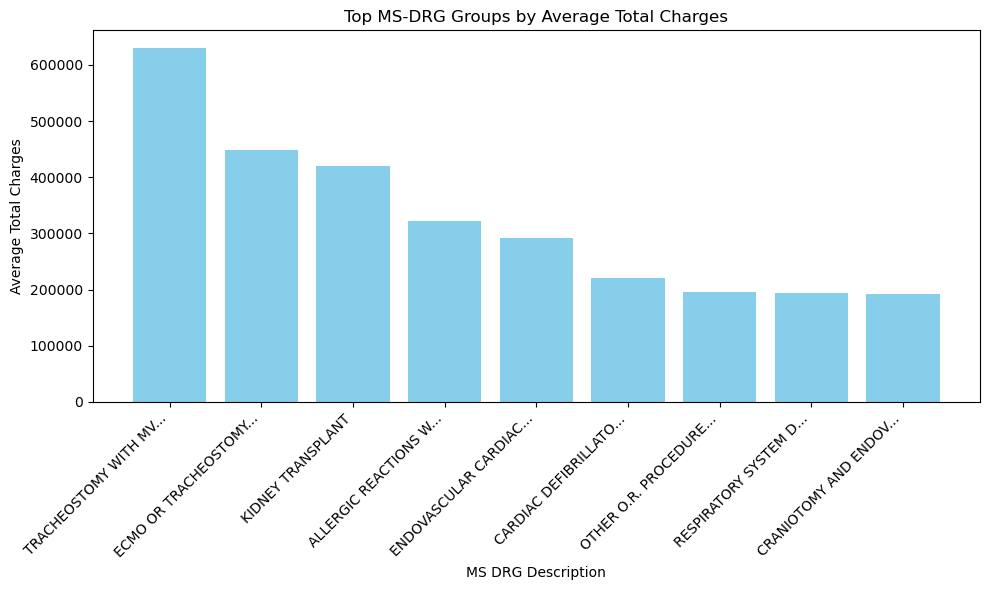

In [52]:
###Q2. Which diagnosis related groups (MS-DRGs) have the highest average charges per patient account?###

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Read the CSV files into pandas DataFrames
accounts_df = pd.read_csv('./Transactional Data/accounts.csv')
charges_df = pd.read_csv('./Transactional Data/charges.csv')
lookup_table_MS_DRG_df = pd.read_csv('./Reference Data/lookup_table_MS DRG.csv')

# Merge charges with accounts to get MS-DRG information
merged_df = pd.merge(charges_df, accounts_df, on='Account ID', how='inner')

# Merge with lookup table to get MS-DRG descriptions
merged_df = pd.merge(merged_df, lookup_table_MS_DRG_df, left_on='MS DRG Code', right_on='MS DRG Code', how='left')

# Group by account ID, MS-DRG code, and MS-DRG description and then calculate average total charges
result_df = merged_df.groupby(['Account ID', 'MS DRG Code', 'MS DRG Description'])['Total Charges'].sum().reset_index()
result_df = result_df.groupby(['MS DRG Code', 'MS DRG Description'])['Total Charges'].mean().reset_index()

# Sort the result by average total charges in descending order
result_df = result_df.sort_values(by='Total Charges', ascending=False)

# Limit the number of MS-DRG groups shown on the chart
top_n = 10

# Select the top n MS-DRG groups
top_n_df = result_df.head(top_n)

# Sort the result by average total charges in descending order
top_n_df_sorted = top_n_df.sort_values(by='Total Charges', ascending=False)

# Truncate descriptions to 20 characters and add "..." if they exceed that length
top_n_df_sorted['MS DRG Description'] = top_n_df_sorted['MS DRG Description'].str[:20] + (top_n_df_sorted['MS DRG Description'].str[20:].apply(lambda x: '...' if x else ''))


# Display the top n MS-DRG groups with the highest average charges per patient account
print("Top MS-DRG Groups by Average Total Charges")
print(tabulate(top_n_df_sorted, headers='keys', tablefmt='pretty', stralign='left', showindex=False))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_n_df_sorted['MS DRG Description'], top_n_df_sorted['Total Charges'], color='skyblue')
plt.xlabel('MS DRG Description')
plt.ylabel('Average Total Charges')
plt.title('Top MS-DRG Groups by Average Total Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
###Q3. Which Attending Provider Service had the highest volume of accounts (encounters) during December 2018?###

import pandas as pd
from tabulate import tabulate

# Read the CSV files into pandas DataFrames
accounts_df = pd.read_csv('./Transactional Data/accounts.csv')
lookup_table_provider_df = pd.read_csv('./Reference Data/lookup_table_provider.csv')

# Filter accounts for December 2018
filtered_accounts = accounts_df[accounts_df['Admit Date'].str.startswith('2018-12')]

# Merge with lookup table to get Provider_Service
merged_df = pd.merge(filtered_accounts, lookup_table_provider_df, left_on='Attending Provider ID', right_on='Provider ID', how='left')

# Filter out null provider services and providers with no data for December 2018
merged_df = merged_df.dropna(subset=['Provider Service'])

# Group by Provider_Service and calculate count of account_id
result_df = merged_df.groupby('Provider Service').agg(account_count=('Account ID', 'count')).reset_index()

# Sort by account_count in descending order
result_df = result_df.sort_values(by='account_count', ascending=False)

# Select the top 5 rows
top_5_services = result_df.head(5)

# Display the result using tabulate
print("Top 5 Attending Provider Services with the highest volume of accounts during December 2018")
print(tabulate(top_5_services, headers='keys', tablefmt='pretty', stralign='left', showindex=False))


Top 5 Attending Provider Services with the highest volume of accounts during December 2018
+-------------------+---------------+
| Provider Service  | account_count |
+-------------------+---------------+
| Internal Medicine | 77            |
| Family Medicine   | 30            |
| Pediatrics        | 19            |
| OB/Gyn            | 9             |
| Neonatology       | 3             |
+-------------------+---------------+


+----------------------+------+----------------------+--------------------+
| Facility Name        | year | total_length_of_stay | avg_length_of_stay |
+----------------------+------+----------------------+--------------------+
| SPRINGFIELD HOSPITAL | 2019 | 1663                 | 4.01               |
| SPRINGFIELD HOSPITAL | 2018 | 1448                 | 3.94               |
| TRINITY HOSPITAL     | 2019 | 2349                 | 3.46               |
| MAPLEWOOD HOSPITAL   | 2018 | 1590                 | 3.4                |
| TRINITY HOSPITAL     | 2018 | 2076                 | 3.14               |
| MAPLEWOOD HOSPITAL   | 2019 | 1336                 | 2.8                |
| LONGWOOD             | 2018 | 1984                 | 2.75               |
| LONGWOOD             | 2019 | 2046                 | 2.66               |
+----------------------+------+----------------------+--------------------+


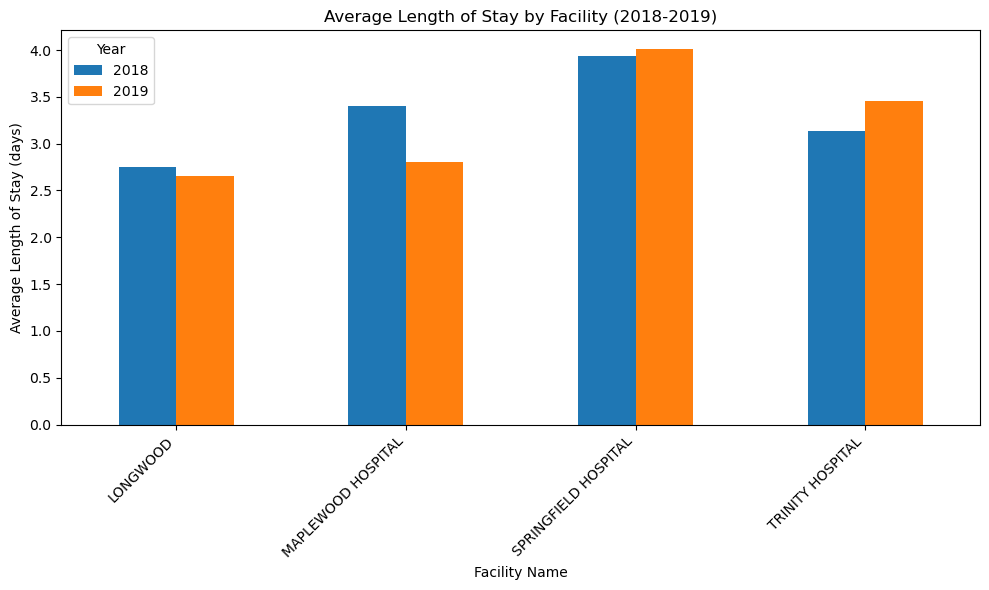

In [57]:
###Q4. What is the “average length of stay” (number of hospital days between admit date and discharge date, but not including discharge date) 
###for each of the 4 facilities for each of the years for which account information are provided (2018 & 2019)###

import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Read the CSV files into pandas DataFrames
accounts_df = pd.read_csv('./Transactional Data/accounts.csv')
lookup_table_facility_df = pd.read_csv('./Reference Data/lookup_table_facility.csv')

# Convert admit_date to datetime format
accounts_df['Admit Date'] = pd.to_datetime(accounts_df['Admit Date'])

# Filter accounts for years 2018 and 2019
filtered_accounts = accounts_df[accounts_df['Admit Date'].dt.year.isin([2018, 2019])]

# Merge with lookup table to get Facility_Name
merged_df = pd.merge(filtered_accounts, lookup_table_facility_df, on='Facility Code', how='inner')

# Calculate total and average length of stay
result_df = merged_df.groupby(['Facility Name', merged_df['Admit Date'].dt.year.rename('year')]).agg(
    total_length_of_stay=('LOS', 'sum'),
    avg_length_of_stay=('LOS', lambda x: round(x.mean() - 1 if x.nunique() > 1 else x.mean(), 2))
).reset_index()

# Sort the result by average length of stay in descending order
result_df = result_df.sort_values(by=['avg_length_of_stay', 'Facility Name', 'year'], ascending=[False, True, True])


# Display the result using tabulate
print(tabulate(result_df, headers='keys', tablefmt='pretty',stralign='left', showindex=False))
#print(result_df.to_string(index=False))

# Pivot the DataFrame for better visualization
pivot_df = result_df.pivot(index='Facility Name', columns='year', values='avg_length_of_stay')

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Length of Stay by Facility (2018-2019)')
plt.xlabel('Facility Name')
plt.ylabel('Average Length of Stay (days)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [90]:
###Q5. Which MS-DRGs Service Lines had the largest difference between the observed length of stay and the national average provided in the MS-DRG reference file? 
###Use the "Arithmetic Mean LOS" field as the national average.###

import pandas as pd
from tabulate import tabulate

# Read the CSV files into pandas DataFrames
accounts_df = pd.read_csv('./Transactional Data/accounts.csv')
lookup_table_MS_DRG_Service_Line_df = pd.read_csv('./Reference Data/lookup_table_MS DRG Service Line.csv')
lookup_table_MS_DRG_df = pd.read_csv('./Reference Data/lookup_table_MS DRG.csv')

# Define LOS using a common table expression (CTE)
LOS = accounts_df.copy()
LOS['LOS'] = LOS.apply(lambda row: row['LOS'] - 1 if row['Discharge Date'] != row['Admit Date'] else row['LOS'], axis=1)

# Merge LOS with MS-DRG service line lookup table
merged_df = pd.merge(LOS, lookup_table_MS_DRG_Service_Line_df, left_on='MS DRG Code', right_on='MS DRG Code')

# Merge with MS-DRG reference table to get national average length of stay
merged_df = pd.merge(merged_df, lookup_table_MS_DRG_df[['MS DRG Code', 'Arithmetic Mean LOS']], on='MS DRG Code')

# Group by service line description and calculate the absolute difference
result_df = merged_df.groupby('Service Line Description').agg({
    'LOS': 'mean',
    'Arithmetic Mean LOS': 'mean'
}).reset_index()

# Calculate the absolute difference between observed and national average length of stay
result_df['Difference'] = abs(result_df['LOS'] - result_df['Arithmetic Mean LOS'])

# Sort by difference in descending order and select top 10
result_df = result_df.sort_values(by='Difference', ascending=False).head(10)

# Display the result using tabulate
print(tabulate(result_df, headers='keys', tablefmt='pretty',stralign='left', showindex=False))


+--------------------------+--------------------+---------------------+--------------------+
| Service Line Description | LOS                | Arithmetic Mean LOS | Difference         |
+--------------------------+--------------------+---------------------+--------------------+
| SURGICAL TRACHEOSTOM     | 44.375             | 26.05               | 18.325             |
| PSYCHIATRY               | 2.8780487804878048 | 5.560975609756097   | 2.6829268292682924 |
| NORMAL NEWBORN           | 1.056768558951965  | 3.140611353711791   | 2.0838427947598257 |
| OTHER OB                 | 1.2857142857142858 | 3.357142857142857   | 2.071428571428571  |
| NEONATOLOGY              | 6.896551724137931  | 5.103448275862069   | 1.7931034482758612 |
| CARDIAC CATHS            | 1.9411764705882353 | 3.6176470588235294  | 1.6764705882352942 |
| OBSTETRICS               | 1.542763157894737  | 3.0246710526315788  | 1.4819078947368418 |
| NEUROLOGY                | 2.4096385542168677 | 3.7771084337349397  